In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from itertools import cycle
filename="20180413_3.bin" #this data set is an extremely short video recorded with a hand held d435
height=480
width=848
cycol = cycle('bgrcmk') #here I'm generating a list of colors I can plot

In [2]:
frames = np.fromfile(filename, dtype=np.uint16) #A highly efficient way of reading binary data with a known data-type, as well as parsing simply formatted text files. Data written using the tofile method can be read using this function.
reshaped = frames.reshape(-1, height, width) #.reshape simply restructures data into dimensions of your choosing. -1 means find the number of segments that structures the data into the dimnesions shown afterwards

In [3]:
!wc -c depthdata.bin #this is a unix command to get the number of bytes in a binary file. Because our data is uint16, each pixel is two bytes

 135137280 depthdata.bin


In [4]:
print(reshaped.shape) #returns the shape of the data. First number is number of frames
#note that the nubmers below are one greater than the actual indices that exist
#there is no reshaped[number_of_frames,height,width], the last frame is reshaped[number_of_frames-1,height-1,width-1]

(22999, 480, 848)


In [5]:
number_of_frames=reshaped.shape[0] #set number of frames equal to the first element in reshaped.shape

In [6]:
print(reshaped[100,100,100]) #print a pixel located at 100,100 in the 100th frame

0


In [7]:
#Here I create np.array containing the value of a single pixel over all the frames of the data
#first, I choose a pixel
rand_height=random.randint(0,height-1) #random pixel's height is between 1 and the height of the video
rand_width=random.randint(0,width-1) #random pixel's width is between 1 and the width of the video

#pixel_values_over_time=np.zeros([number_of_frames]) #first I create an empty array of zeros
pixel_values_over_time=[]
for a_frame in range(0,number_of_frames): #the for loop starts at the first index and goes until for the number of frames
    current_pixel_value=reshaped[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
    pixel_values_over_time=np.append(pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
    
print(rand_height,rand_width)
print(pixel_values_over_time)

90 361
[684. 682. 683. ... 686. 681. 683.]


In [8]:
print(pixel_values_over_time.size) #use size instead of shape because it's one dimensional.

22999


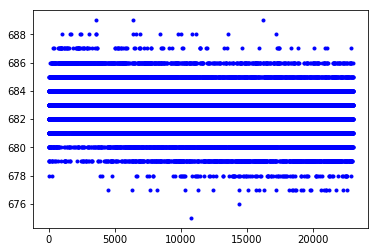

In [9]:
plt.plot([range(0,pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

In [10]:
#now let's say I want to look at how much the pixel deviated from it's starting position.
#I want to subtract all values of in the array by the value in the first position in the array.

In [11]:
change_in_pixel_values_over_time=pixel_values_over_time-pixel_values_over_time[0]

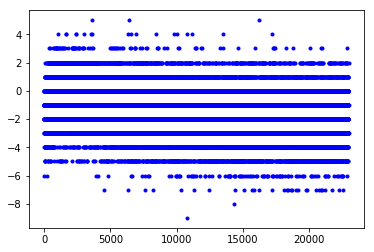

In [12]:
plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],'b.') #plotting the pixel over time
plt.show() #showing the plot 

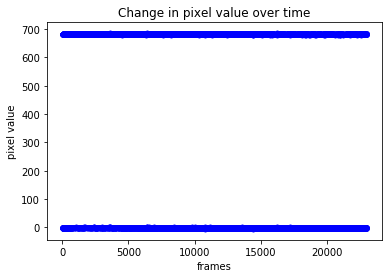

In [13]:
#LOOK HOW EASY IT IS TO PUT TWO THINGS ON THE SAME PLOT (and add basic labels)
plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],'b.') #plotting the pixel over time
plt.plot([range(0,pixel_values_over_time.size)],[pixel_values_over_time],'b.') #plotting the pixel over time
plt.xlabel('frames')
plt.ylabel('pixel value')
plt.title('Change in pixel value over time')
plt.show() #showing the plot 

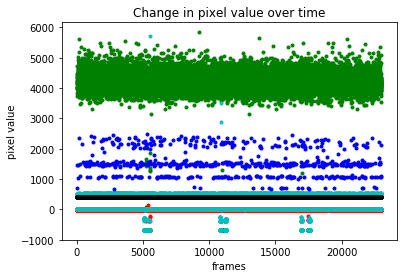

In [14]:
#Now I want to plot SEVERAL the pixels over time
number_of_pixels_I_want_to_plot=10;
for n in range(0,number_of_pixels_I_want_to_plot):
    rand_height=random.randint(0,height-1) #random pixel's height is between 1 and the height of the video
    rand_width=random.randint(0,width-1) #random pixel's width is between 1 and the width of the video

    #pixel_values_over_time=np.zeros([number_of_frames]) #first I create an empty array of zeros
    pixel_values_over_time=[]
    for a_frame in range(0,number_of_frames): #the for loop starts at the first index and goes until for the number of frames
        current_pixel_value=reshaped[a_frame,rand_height,rand_width] #the current pixel is equal to the value fo reshaped at the frame number specified by the loop and at the pixel location specified by random.randomint
        pixel_values_over_time=np.append(pixel_values_over_time,current_pixel_value) #append the current pixel value to empty pixel_values_over_time array
        change_in_pixel_values_over_time=pixel_values_over_time-pixel_values_over_time[0]
    plt.plot([range(0,change_in_pixel_values_over_time.size)],[change_in_pixel_values_over_time],marker='.',linestyle='-',color=next(cycol)) #plotting the pixel over time for some reason plotting the line doesnt work, only plotting the . or + works
plt.xlabel('frames')
plt.ylabel('pixel value')
plt.title('Change in pixel value over time')
plt.show()


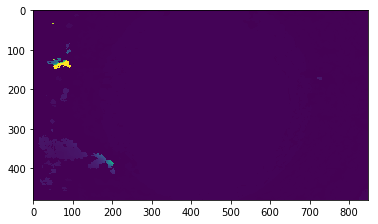

In [4]:
x=plt.imshow(reshaped[51])

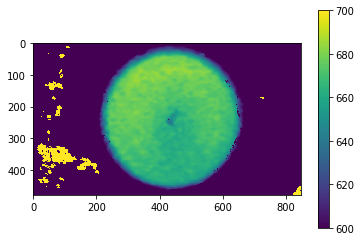

In [5]:
x=plt.colorbar(plt.imshow(reshaped[51]))
plt.clim(600,700)

In [150]:
import matplotlib.colors as mcol
import matplotlib.cm as cm
import math

In [4]:
print(np.amax(reshaped[51]))

65535


In [5]:
print(np.amin(reshaped[51]))

0


In [6]:
maxvalue=700
minvalue=600
pixelrange = range(minvalue,maxvalue+1)

In [9]:
cm1 = mcol.LinearSegmentedColormap.from_list("RedtoBlueColorMap",["r","b"])

In [10]:
cnorm = mcol.Normalize(vmin=min(pixelrange),vmax=max(pixelrange))

In [11]:
cpick = cm.ScalarMappable(norm=cnorm,cmap=cm1)
cpick.set_array([])

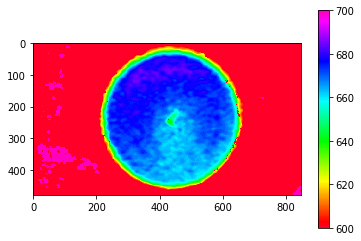

In [13]:
#plt.colorbar(plt.imshow(reshaped[51],cmap='jet'))
plt.colorbar(plt.imshow(reshaped[51],cmap='gist_rainbow'))
plt.clim(600,700)

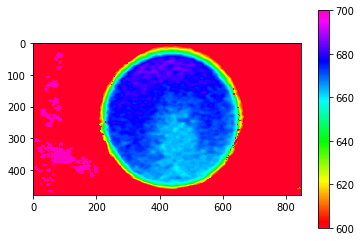

In [141]:
plt.colorbar(plt.imshow(reshaped[5350],cmap='gist_rainbow'))
plt.clim(600,700)

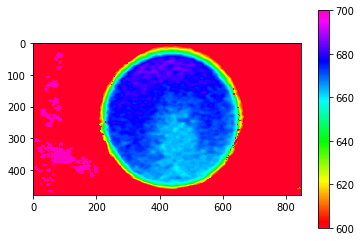

In [15]:
plt.colorbar(plt.imshow(reshaped[5350],cmap='gist_rainbow'))
plt.clim(600,700)

In [12]:
background=np.mean(reshaped[5300:5350], axis=0)
#backgroundvar=np.var(reshaped[0],reshaped[1],reshaped[2],reshaped[3])

In [17]:
print(background)

[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   6.42   0.     0.  ]
 [  0.     0.     0.   ...  25.62   0.     0.  ]
 ...
 [  0.     0.     0.   ... 551.24 540.12   0.  ]
 [  0.     0.     0.   ... 539.44 461.42   0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


In [18]:
print(background.shape)

(480, 848)


In [13]:
subtracted=reshaped[51]-background
print(subtracted)

[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...  -6.42   0.     0.  ]
 [  0.     0.     0.   ... -25.62   0.     0.  ]
 ...
 [  0.     0.     0.   ... 449.76 459.88   0.  ]
 [  0.     0.     0.   ... 461.56 538.58   0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


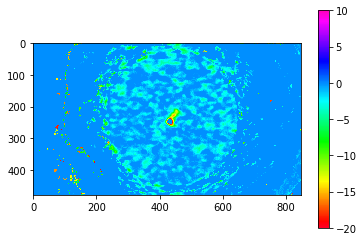

In [77]:
plt.colorbar(plt.imshow(subtracted,cmap='gist_rainbow'))
plt.clim(-20,10)

In [34]:
np.amax(subtracted)

65535.0

In [78]:
print(subtracted[230,440])

-14.120000000000005


In [95]:
subtractedmod=subtracted

In [108]:
subtractedmod[subtractedmod>0]=0
subtractedmod[subtractedmod<-40]=0

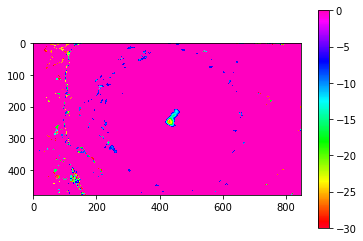

In [109]:
plt.colorbar(plt.imshow(subtractedmod,cmap='gist_rainbow'))
plt.clim(-30,0)

In [110]:
print(np.amin(subtractedmod))

-30.0


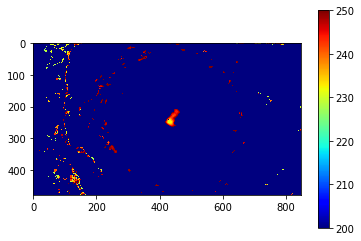

In [111]:
import cv2
filtered=cv2.medianBlur(subtractedmod.astype(np.uint8), 1) #has to be uint8 in order to use cv2 threshold and median filtering
plt.colorbar(plt.imshow(filtered,cmap='jet'))
plt.clim(200,250)

In [112]:
print(filtered)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 250   0   0]
 [  0   0   0 ... 231   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [113]:
print(np.amax(filtered))

250


In [114]:
background2=np.max(reshaped[5300:5350], axis=0)

In [115]:
subtracted2=reshaped[51]-background2
print(subtracted2)

[[    0     0     0 ...     0     0     0]
 [    0     0     0 ... 65215     0     0]
 [    0     0     0 ... 65215     0     0]
 ...
 [    0     0     0 ...   438   437     0]
 [    0     0     0 ...   440   439     0]
 [    0     0     0 ...     0     0     0]]


In [116]:
subtractedmod2=subtracted2

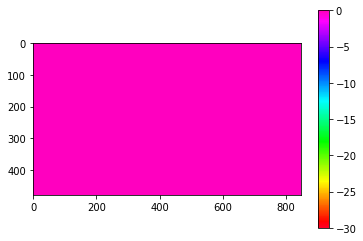

In [117]:
plt.colorbar(plt.imshow(subtractedmod2,cmap='gist_rainbow'))
plt.clim(-30,0)

In [118]:
subset=subtractedmod[200:300,400:500]

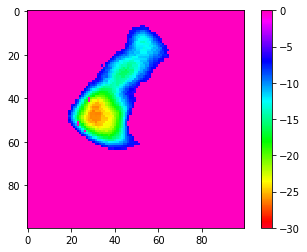

In [119]:
plt.colorbar(plt.imshow(subset,cmap='gist_rainbow'))
plt.clim(-30,0)

In [120]:
print(subset.shape)

(100, 100)


In [125]:
reshapedzoomed=reshaped[51][200:300,400:500]

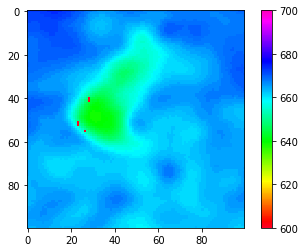

In [130]:
plt.colorbar(plt.imshow(reshapedzoomed,cmap='gist_rainbow'))
plt.clim(600,700)

In [131]:
print(reshapedzoomed.shape)

(100, 100)


In [132]:
print(reshapedzoomed)

[[672 673 673 ... 670 670 670]
 [672 672 672 ... 669 669 669]
 [672 672 672 ... 668 668 669]
 ...
 [665 665 665 ... 663 663 663]
 [665 665 665 ... 662 663 663]
 [665 664 664 ... 662 662 662]]


In [142]:
#find squares significantly different from the background (located between 5300 and 5350)
#get mean and variance of background, then find all pixels that differ and mutliply that by 0!
backgroundmean=np.mean(reshaped[5250:5350], axis=0)
backgroundvariance=np.var(reshaped[5250:5350], axis=0)
#let's use frame 51 as an example
fiftyone=reshaped[51]
print(backgroundvariance)
#it's worth finding out if the noise follows a normal distribution

[[    0.         0.         0.     ...     0.         0.         0.    ]
 [    0.         0.         0.     ...  1020.1059     0.         0.    ]
 [    0.         0.         0.     ...  9250.6564     0.         0.    ]
 ...
 [    0.         0.         0.     ...   475.32    6070.7964     0.    ]
 [    0.         0.         0.     ...  3289.8344 23631.0296     0.    ]
 [    0.         0.         0.     ...     0.         0.         0.    ]]


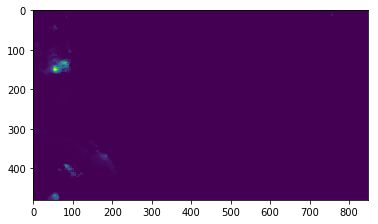

In [143]:
plt.imshow(backgroundvariance)

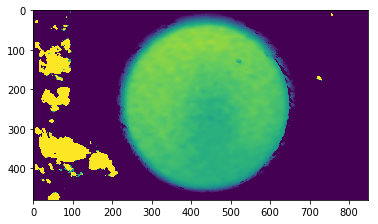

In [145]:
plt.imshow(backgroundmean)
plt.clim(600,700)

In [160]:
print(2*np.sqrt(backgroundvariance))

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  63.87819346   0.
    0.        ]
 [  0.           0.           0.         ... 192.36066542   0.
    0.        ]
 ...
 [  0.           0.           0.         ...  43.60366957 155.83063114
    0.        ]
 [  0.           0.           0.         ... 114.71415606 307.44774906
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [177]:
print(np.abs(fiftyone - backgroundmean))

[[  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   3.21   0.     0.  ]
 [  0.     0.     0.   ...  32.06   0.     0.  ]
 ...
 [  0.     0.     0.   ... 466.   475.94   0.  ]
 [  0.     0.     0.   ... 472.16 515.52   0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


In [170]:
print(np.abs(fiftyone - backgroundmean) - 2*np.sqrt(backgroundvariance)) #positive means you are DIFFERENT from expected

[[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...  -60.66819346
     0.            0.        ]
 [   0.            0.            0.         ... -160.30066542
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  422.39633043
   320.10936886    0.        ]
 [   0.            0.            0.         ...  357.44584394
   208.07225094    0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]


In [328]:
backgroundmultiplier=np.abs(fiftyone - backgroundmean) - (5*np.sqrt(backgroundvariance)) #if its 5 stdev awayits NOISE

In [329]:
#print(backgroundmultiplier)

In [330]:
#fsdfsdf=(np.abs(fiftyone - backgroundmean))
#rsfsdf=5*np.sqrt(backgroundvariance)
#backgroundmultiplier=np.subtract(fsdfsdf,rsfsdf)

In [331]:
backgroundmultiplier[backgroundmultiplier>=0]=1
backgroundmultiplier[backgroundmultiplier<0]=0

In [332]:
newfiftyone=np.multiply(fiftyone,backgroundmultiplier)

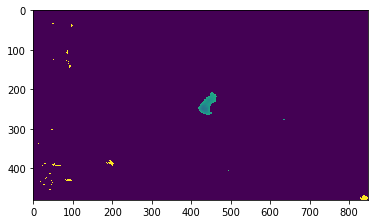

In [333]:
plt.imshow(newfiftyone)
plt.clim(600,700)

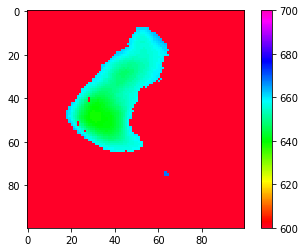

In [334]:
subset2=newfiftyone[200:300,400:500]
#plt.imshow(subset2)
plt.colorbar(plt.imshow(subset2,cmap='gist_rainbow'))
plt.clim(600,700)

In [364]:
#Can I write a script/funciton to be able to find the calibration object?
#perhaps I can look for the row and column with the most non zero values
winningrow=0
winningcountr=width
for rowpixels in range(0,height):
    currentcountr=np.count_nonzero(newfiftyone[rowpixels,:]==0)
    if currentcountr<winningcountr:
        winningcountr=currentcountr
        winningrow=rowpixels
print(winningrow) 

winningcolumn=0
winningcountc=height
for columnpixels in range(0,width):
    currentcountc=np.count_nonzero(newfiftyone[:,columnpixels]==0)
    if currentcountc<winningcountc:
        winningcountc=currentcountc
        winningcolumn=rowpixels
print(winningcolumn)  

226
479


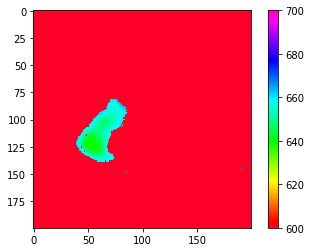

In [369]:
subset3=newfiftyone[winningrow-100:winningrow+100,winningcolumn-100:winningcolumn+100]
plt.colorbar(plt.imshow(subset3,cmap='gist_rainbow'))
plt.clim(600,700)

In [370]:
print(subset3.shape)

(200, 200)


233
479


NameError: name 'imshow' is not defined

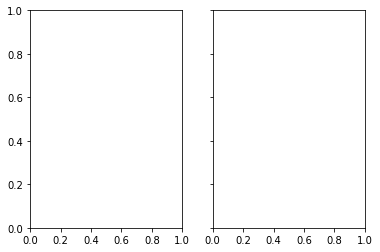

In [389]:
#Now let's try to put this all together but in another random frame
#pick a frame
picked_frame=18000
frame_of_interest=reshaped[picked_frame] 
#know your background (I happen to know background is between frame 5250 and 5350)
backgroundmean=np.mean(reshaped[5250:5350], axis=0)
backgroundvariance=np.var(reshaped[5250:5350], axis=0)
#if the difference between the background and the frame is greater than expected, it's probably our object! 
#note that I arbitrarily pick 5 stdeviations away, it's worth knowing if the noise is actually gaussian
backgroundmultiplier=np.abs(frame_of_interest - backgroundmean) - (5*np.sqrt(backgroundvariance)) #if its 5 standard its NOISE
#we expect positive values for high differences. make them stay by multiplying by 1
backgroundmultiplier[backgroundmultiplier>0]=1
#we expect negative values or no change for small differences. probably just noise, get rid of them by multiplying by 0
backgroundmultiplier[backgroundmultiplier<=0]=0
#apply our expectations to the matrix
frame_of_interest_backgroundsubtracted=np.multiply(frame_of_interest,backgroundmultiplier)

#now let's find the object! Below, I'm looking for the rows and columns with the least non zero values

winningrow=0
winningcountr=width
for rowpixels in range(0,height):
    currentcountr=np.count_nonzero(frame_of_interest_backgroundsubtracted[rowpixels,:]==0)
    if currentcountr<winningcountr:
        winningcountr=currentcountr
        winningrow=rowpixels
print(winningrow) 

winningcolumn=0
winningcountc=height
for columnpixels in range(0,width):
    currentcountc=np.count_nonzero(frame_of_interest_backgroundsubtracted[:,columnpixels]==0)
    if currentcountc<winningcountc:
        winningcountc=currentcountc
        winningcolumn=rowpixels
print(winningcolumn)  

#I can plot the background subtracted image

#plt.imshow(frame_of_interest_backgroundsubtracted)
#plt.clim(600,700)

#An I can also plot the image cropped according to the least number of zero rows/columns "algorithim"

#frame_of_interest_backgroundsubtracted_zoomed=frame_of_interest_backgroundsubtracted[winningrow-100:winningrow+100,winningcolumn-100:winningcolumn+100]
#plt.colorbar(plt.imshow(frame_of_interest_backgroundsubtracted_zoomed,cmap='gist_rainbow'))
#plt.clim(600,700)


